# Exercises

In [1]:
import os
def savefig(fig, name):
    if not os.path.exists('images'):
        os.makedirs('images')
    fig.savefig('images/' + name + '.png')


## 1. What is the fundamental idea behind support vector machines?

The fundamental ideal behind SVM is to fit the widest street between the classes. When performing soft margin classification, the SVM will make the balance between street as widest as possible and perfect linearly separable. Another idea is SVM is flexible ML algorithm, it can useful with linear, nonlinear, novelty detection.  

## 2. What is a support vector?

Support vector is any instance located on the street, including its border. The decision boundary is entirely determined by the support vector. Computing predictions with kernel only based on support vectors, not the whole training set.

## 3. Why is it important to scale the inputs when using SVMs?

It is mainly because the SVMs are sensitive to the feature scales.

![scale and nonscale](images/scale_and_nonscale.png)

## 4. Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?

SVM can output a confidence score by using `decision_function()`. These score represent the distance between the instance and the decision boundary.

They cannot out put a probability, if you use `SVC` class and set the `probability=True`, then model will fill fit an extra model at the end of training to map the SVM decision function scores to estimated probabilities. This requires using 5-fold cross-validation to generate out-of-sample predictions for every instance in the training set, then training `LogisticRegression` model. After that, `predict_proba()` and `predict_log_proba()` methods will be available.

## 5. How can you choose between LinearSVC, SVC, and SGDClassifier?



Use SVC for nonlinear tasks. SVC class does not scale well to datasets with many instances. It does scale well to large number of features. The LinearSVC class implements an optimized algorithm for linear SVMs, while SGDClassifier uses Stochastic Gradient Descent. Maybe LinearSVC a bit faster, but not always and SGDClassifier is more flexible, it supports incremental learning.

## 6. Say you’ve trained an SVM classifier with an RBF kernel, but it seems to underfit the training set. Should you increase or decrease γ (gamma)? What about C?

If the model underfiting the training set I will increase $\gamma$ or $C$ or both.


## 7. What does it mean for a model to be ϵ-insensitive?

When you add more training instances within the margin, it will not affect the model's prediction; thus, the model is $\epsilon$-insensitive.

## 8. What is the point of using the kernel trick?

Kernel trick make SVM magic. Example: If you add polynomial by `PolynomialFeatures` it will make the model too slow when the degree is high, but with poly Kernel, It return the same result, if you had added many features, without actually having to add them. The kernel trick makes it possible to train a nonlinear SVM model. The resulting model is equivalent to mapping the inputs to another space using a nonlinear transformation. In conclusion, the kernel trick gives the same result without having to transform the inputs at all.  

## 9. Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y==0) | (y==1) # take two classes setosa and versicolor

X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [3]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

C = 5
alpha = .5

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf = LinearSVC(loss="hinge", C=C, dual=True, random_state=42).fit(X_scaled, y)
svc_clf = SVC(kernel="linear", C=C).fit(X_scaled, y)
sgd_clf = SGDClassifier(alpha=alpha, random_state=42).fit(X_scaled, y)

In [4]:
sgd_clf.coef_, sgd_clf.intercept_

(array([[0.56375197, 0.52415519]]), array([0.03843208]))

In [5]:
def compute_decision_boundary(model):
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]
    return scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])

lin_line = compute_decision_boundary(lin_clf)
svc_line = compute_decision_boundary(svc_clf)
sgd_line = compute_decision_boundary(sgd_clf)

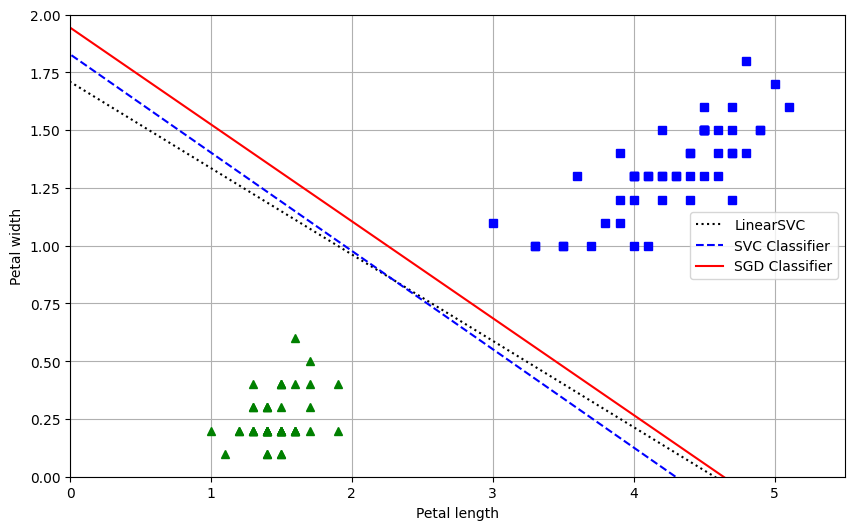

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")

plt.plot(lin_line[:, 0], lin_line[:, 1], "k:", label="LinearSVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", label="SVC Classifier")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGD Classifier")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([0, 5.5, 0, 2])
plt.legend()
plt.grid()

savefig(plt, "exercise9")

plt.show()

## 10. Train an SVM classifier on the wine dataset, which you can load using sklearn.datasets.load_wine(). This dataset contains the chemical analyses of 178 wine samples produced by 3 different cultivators: the goal is to train a classification model capable of predicting the cultivator based on the wine’s chemical analysis. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all three classes. What accuracy can you reach?


In [7]:
from sklearn import datasets
import pandas as pd

wine = datasets.load_wine(as_frame=True)
wine.data.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [8]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [9]:
X = wine.data.values
y = wine.target

In [10]:
from sklearn.model_selection import train_test_split
X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = .2, random_state = 42)


In [11]:
linear_svc = LinearSVC(random_state=42, dual = True).fit(X_train, y_train)

In [12]:
from sklearn.model_selection import cross_val_score

cross_val_score(linear_svc, X_train, y_train).mean()

0.9650246305418719

In [13]:
svc_clf = SVC(random_state=42).fit(X_train, y_train)

In [14]:
cross_val_score(svc_clf, X_train, y_train).mean()

0.97192118226601

In [15]:
# Fine tuning svc clf model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

param = {
    "gamma": loguniform(0.001, 0.1),
    "C": uniform(1, 10)
}

rnd_search_cv = RandomizedSearchCV(svc_clf, param, n_iter=100, cv=5, random_state=42)
rnd_search_cv.fit(X_train, y_train)
rnd_search_cv.best_estimator_

SVC(C=2.560186404424365, gamma=0.002051110418843397, random_state=42)

In [16]:
rnd_search_cv.best_score_

0.9857142857142858

In [17]:
rnd_search_cv.score(X_test, y_test)

1.0

## 11. Train and fine-tune an SVM regressor on the California housing dataset. You can use the original dataset rather than the tweaked version we used in Chapter 2, which you can load using sklearn.datasets.fetch_california_housing(). The targets represent hundreds of thousands of dollars. Since there are over 20,000 instances, SVMs can be slow, so for hyperparameter tuning you should use far fewer instances (e.g., 2,000) to test many more hyperparameter combinations. What is your best model’s RMSE?


In [22]:
housing = datasets.fetch_california_housing()
X = housing.data
y = housing.target

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [37]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error

lin_reg = make_pipeline(
    StandardScaler(),
    LinearSVR(max_iter=1000000, dual=True, random_state=42)
)

lin_reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr',
                 LinearSVR(dual=True, max_iter=1000000, random_state=42))])

In [34]:
cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=5)

array([-0.54122564, -0.53347784, -6.71449235, -1.01647786, -0.83835797])

In [38]:
y_pred = lin_reg.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mse

0.9595484665813285

In [44]:
from sklearn.svm import SVR
svm_reg = make_pipeline(
    StandardScaler(),
    SVR()
)

param = {
    "svr__gamma": loguniform(0.001, 0.1),
    "svr__C": uniform(1, 10)
}
rnd_search_cv = RandomizedSearchCV(svm_reg, param, n_iter=100, cv=3, random_state=42)
rnd_search_cv.fit(X_train[:2000], y_train[:2000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('svr', SVR())]),
                   n_iter=100,
                   param_distributions={'svr__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000026E9B156FF0>,
                                        'svr__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000026E9751BB30>},
                   random_state=42)

In [45]:
rnd_search_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=4.63629602379294, gamma=0.08781408196485979))])

In [46]:
-cross_val_score(rnd_search_cv.best_estimator_, X_train, y_train, scoring = "neg_root_mean_squared_error")

array([0.58835648, 0.57468589, 0.58085278, 0.57109886, 0.59853029])

In [49]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.5854732265172239